In [61]:
#Import all the Dependencies
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [62]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [63]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\vivek\Downloads\Datasets\Datasets\Train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 64 files belonging to 3 classes.


In [64]:
class_names = dataset.class_names
class_names

['audi', 'lamborghini', 'mercedes']

In [65]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 0 2 2 2 2 0 0 2 2 1 2 1 1 1 0 2 2 1 0 2 1 2 0 0 0 0 0 1 2 2]


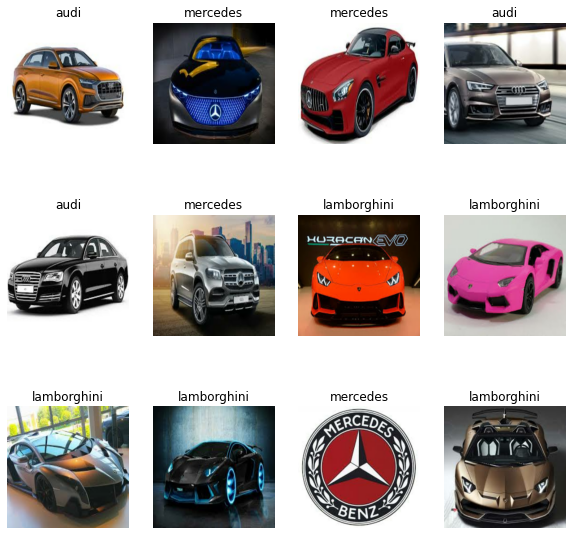

In [66]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [67]:
len(dataset)

2

In [68]:
train_dir = r"C:\Users\vivek\Downloads\Datasets\Datasets\Train"
test_dir = r"C:\Users\vivek\Downloads\Datasets\Datasets\Test"

In [69]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['audi' 'lamborghini' 'mercedes']


In [70]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['audi' 'lamborghini' 'mercedes']


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_1 = Sequential([
  Conv2D(3, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(3, 3, activation='relu'),
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [73]:
history = model_1.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=test_data,
    verbose=1,
    epochs=50,
)

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 1.0947 - accuracy: 0.4062 - val_loss: 1.1808 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 1.0155 - accuracy: 0.3906 - val_loss: 1.1426 - val_accuracy: 0.2586
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.9248 - accuracy: 0.6719 - val_loss: 1.0714 - val_accuracy: 0.3793
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 0.8416 - accuracy: 0.9062 - val_loss: 0.9812 - val_accuracy: 0.6207
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.7478 - accuracy: 0.9688 - val_loss: 0.9386 - val_accuracy: 0.6552
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 0.6485 - accuracy: 0.9844 - val_loss: 0.9102 - val_accuracy: 0.6724
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.5486 - accuracy: 0.9844 - val_loss: 0.8830 - val_accuracy: 0.6379
Epoch 8/50
2/2 [=========================

In [74]:
# Evaluate on the test data
model_1.evaluate(test_data)

2/2 [==============================] - 1s 188ms/step - loss: 1.5070 - accuracy: 0.6207


[1.5070208311080933, 0.6206896305084229]

In [75]:

# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
  


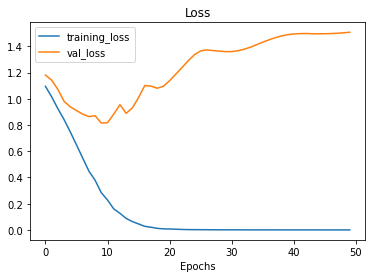

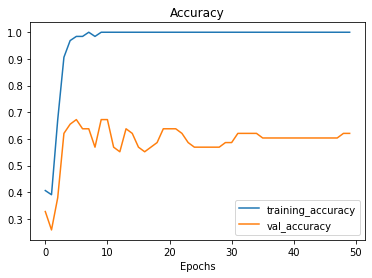

In [76]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history)

In [78]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(3, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=50,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
2/2 [==============================] - 1s 880ms/step - loss: 1.1188 - accuracy: 0.2969 - val_loss: 1.1498 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 627ms/step - loss: 1.0306 - accuracy: 0.3906 - val_loss: 1.0917 - val_accuracy: 0.3448
Epoch 3/50
2/2 [==============================] - 1s 619ms/step - loss: 0.9697 - accuracy: 0.5312 - val_loss: 1.0359 - val_accuracy: 0.6034
Epoch 4/50
2/2 [==============================] - 1s 608ms/step - loss: 0.9076 - accuracy: 0.8594 - val_loss: 1.0165 - val_accuracy: 0.6034
Epoch 5/50
2/2 [==============================] - 1s 675ms/step - loss: 0.8450 - accuracy: 0.9375 - val_loss: 1.0067 - val_accuracy: 0.5862
Epoch 6/50
2/2 [==============================] - 1s 661ms/step - loss: 0.7793 - accuracy: 0.9375 - val_loss: 0.9938 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 1s 635ms/step - loss: 0.7147 - accuracy: 0.9531 - val_loss: 0.9827 - val_accuracy: 0.5517
Epoch 8/50
2/2 [====

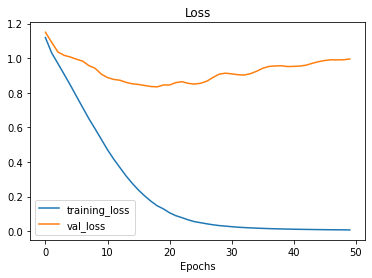

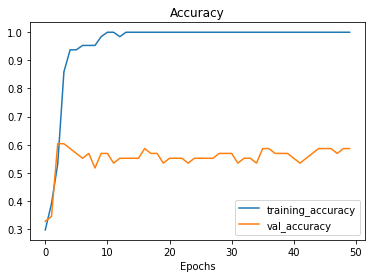

In [79]:
# Check out the loss curves of model_10
plot_loss_curves(history_2)

In [80]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 64 images belonging to 3 classes.


In [81]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (same setup as used for model_2)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=50,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 1.1541 - accuracy: 0.2344 - val_loss: 1.1357 - val_accuracy: 0.3448
Epoch 2/50
2/2 [==============================] - 1s 837ms/step - loss: 1.1124 - accuracy: 0.3906 - val_loss: 1.1850 - val_accuracy: 0.2759
Epoch 3/50
2/2 [==============================] - 1s 841ms/step - loss: 1.1090 - accuracy: 0.3438 - val_loss: 1.2074 - val_accuracy: 0.1724
Epoch 4/50
2/2 [==============================] - 1s 847ms/step - loss: 1.1035 - accuracy: 0.3594 - val_loss: 1.1685 - val_accuracy: 0.1897
Epoch 5/50
2/2 [==============================] - 1s 869ms/step - loss: 1.0653 - accuracy: 0.3750 - val_loss: 1.1333 - val_accuracy: 0.3103
Epoch 6/50
2/2 [==============================] - 2s 862ms/step - loss: 1.0751 - accuracy: 0.4062 - val_loss: 1.1112 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 852ms/step - loss: 1.0389 - accuracy: 0.6250 - val_loss: 1.0955 - val_accuracy: 0.4138
Epoch 8/50
2/2 [=======

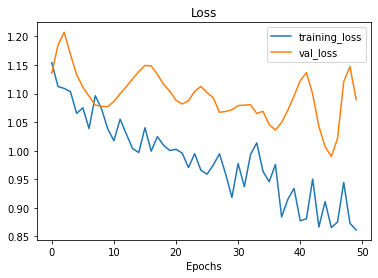

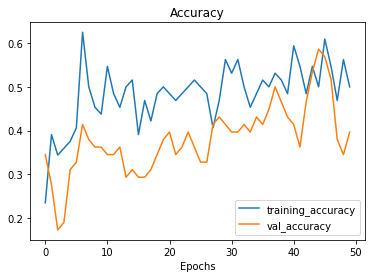

In [82]:
# Check out our model's performance with augmented data
plot_loss_curves(history_3)


In [83]:
# What classes has our model been trained on?
class_names

array(['audi', 'lamborghini', 'mercedes'], dtype='<U11')

In [84]:


import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
  
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

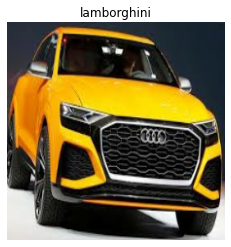

In [85]:
# Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\audi\26.jpg")

# Make a prediction
pred = model_2.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_4 = models.Sequential([
    layers.Conv2D(3, kernel_size = (3,3), activation='relu', ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(3,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(3,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(3, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(3, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(3, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(3, activation='relu'),
   
])


# Compile the model
model_4.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [87]:
# Fit the model
history_4 = model_4.fit(train_data, # now 10 different classes 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
2/2 [==============================] - 2s 805ms/step - loss: 7.3060 - accuracy: 0.4219 - val_loss: 5.8934 - val_accuracy: 0.4828
Epoch 2/50
2/2 [==============================] - 1s 648ms/step - loss: 6.6063 - accuracy: 0.4531 - val_loss: 5.7590 - val_accuracy: 0.4655
Epoch 3/50
2/2 [==============================] - 1s 629ms/step - loss: 6.5810 - accuracy: 0.4219 - val_loss: 4.4176 - val_accuracy: 0.4655
Epoch 4/50
2/2 [==============================] - 1s 639ms/step - loss: 5.9656 - accuracy: 0.3438 - val_loss: 3.8773 - val_accuracy: 0.4828
Epoch 5/50
2/2 [==============================] - 1s 668ms/step - loss: 5.9505 - accuracy: 0.3438 - val_loss: 3.1407 - val_accuracy: 0.4655
Epoch 6/50
2/2 [==============================] - 1s 618ms/step - loss: 5.5086 - accuracy: 0.3438 - val_loss: 3.1113 - val_accuracy: 0.4655
Epoch 7/50
2/2 [==============================] - 1s 695ms/step - loss: 5.5014 - accuracy: 0.3594 - val_loss: 3.1004 - val_accuracy: 0.4483
Epoch 8/50
2/2 [====

In [88]:
# Evaluate on the test data
model_4.evaluate(test_data)

2/2 [==============================] - 0s 124ms/step - loss: 3.6677 - accuracy: 0.4138


[3.6677002906799316, 0.4137931168079376]

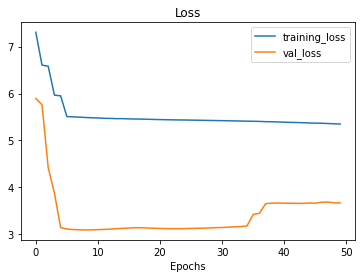

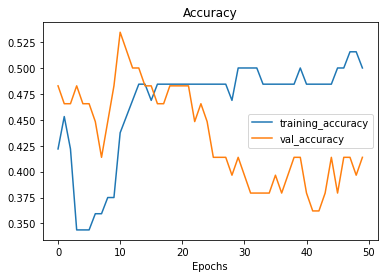

In [89]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_4)

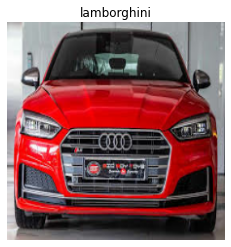

In [95]:
# Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\audi\23.jpg")

# Make a prediction
pred = model_4.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

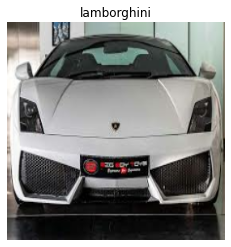

In [93]:
# Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\lamborghini\14.jpg")

# Make a prediction
pred = model_4.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

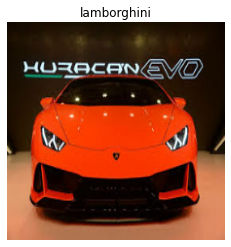

In [94]:
# Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\lamborghini\10.jpg")

# Make a prediction
pred = model_4.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [97]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 64 images belonging to 3 classes.


In [99]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_5 = Sequential([
  Conv2D(3, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(3, 3, activation='relu'),
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled,
                        epochs=25,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/25
2/2 [==============================] - 3s 2s/step - loss: 0.6825 - accuracy: 0.2969 - val_loss: 0.7483 - val_accuracy: 0.3333
Epoch 2/25
2/2 [==============================] - 2s 1s/step - loss: 0.5089 - accuracy: 0.2969 - val_loss: 0.8982 - val_accuracy: 0.3333
Epoch 3/25
2/2 [==============================] - 2s 1s/step - loss: 0.2980 - accuracy: 0.2969 - val_loss: 1.2362 - val_accuracy: 0.3333
Epoch 4/25
2/2 [==============================] - 2s 1s/step - loss: 0.1325 - accuracy: 0.2969 - val_loss: 1.7809 - val_accuracy: 0.3333
Epoch 5/25
2/2 [==============================] - 2s 1s/step - loss: -0.0319 - accuracy: 0.2969 - val_loss: 2.4533 - val_accuracy: 0.3333
Epoch 6/25
2/2 [==============================] - 2s 1s/step - loss: -0.2185 - accuracy: 0.2969 - val_loss: 3.2274 - val_accuracy: 0.3333
Epoch 7/25
2/2 [==============================] - 2s 1s/step - loss: -0.2743 - accuracy: 0.2969 - val_loss: 4.2120 - val_accuracy: 0.3333
Epoch 8/25
2/2 [======================

In [100]:
# Evaluate on the test data
model_5.evaluate(test_data)

2/2 [==============================] - 0s 190ms/step - loss: 55.0627 - accuracy: 0.3333


[55.062721252441406, 0.3333333432674408]

In [103]:
# Create the model (same as model_5 and model_6)
model_6 = Sequential([
  Conv2D(3, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(3, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='softmax')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
2/2 [==============================] - 2s 1s/step - loss: 0.6682 - accuracy: 0.2969 - val_loss: 0.7215 - val_accuracy: 0.3333
Epoch 2/5
2/2 [==============================] - 2s 874ms/step - loss: 0.6183 - accuracy: 0.2969 - val_loss: 0.7506 - val_accuracy: 0.3333
Epoch 3/5
2/2 [==============================] - 2s 869ms/step - loss: 0.5719 - accuracy: 0.2969 - val_loss: 0.7978 - val_accuracy: 0.3333
Epoch 4/5
2/2 [==============================] - 2s 866ms/step - loss: 0.4780 - accuracy: 0.2969 - val_loss: 0.8751 - val_accuracy: 0.3333
Epoch 5/5
2/2 [==============================] - 2s 970ms/step - loss: 0.3826 - accuracy: 0.2969 - val_loss: 1.0006 - val_accuracy: 0.3333


In [119]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [120]:
import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
  
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
  
# Create function to unzip a zipfile into current working directory 
# (since we're going to be downloading and unzipping a few files)
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [133]:
def create_model(model_url, num_classes=3):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer')
                                           
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [134]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [136]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=50,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) 

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20211225-154459
Epoch 1/50
2/2 [==============================] - 9s 6s/step - loss: 0.4190 - accuracy: 0.8594 - val_loss: 0.6990 - val_accuracy: 0.6379
Epoch 2/50
2/2 [==============================] - 8s 6s/step - loss: 0.3581 - accuracy: 0.8594 - val_loss: 0.6442 - val_accuracy: 0.6552
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 0.3072 - accuracy: 0.8906 - val_loss: 0.6096 - val_accuracy: 0.7069
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 0.2697 - accuracy: 0.9219 - val_loss: 0.5846 - val_accuracy: 0.7069
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 0.2407 - accuracy: 0.9531 - val_loss: 0.5654 - val_accuracy: 0.7069
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 0.2149 - accuracy: 0.9531 - val_loss: 0.5491 - val_accuracy: 0.7241
Epoch 7/50
2/2 [==============================] - 8s 6s/step - loss: 0.1923 - accuracy: 0.9844 - val_lo

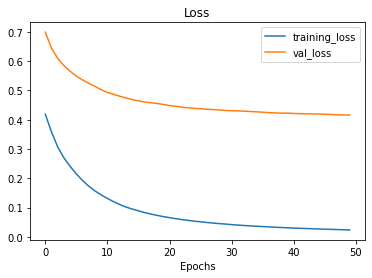

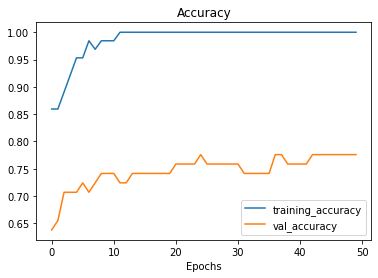

In [137]:
plot_loss_curves(resnet_history)

In [146]:
# # New: EfficientNetB0 feature vector (version 2)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [152]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=50, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20211225-175315
Epoch 1/50
2/2 [==============================] - 10s 4s/step - loss: 1.1120 - accuracy: 0.3281 - val_loss: 1.0466 - val_accuracy: 0.4828
Epoch 2/50
2/2 [==============================] - 4s 3s/step - loss: 0.9908 - accuracy: 0.5000 - val_loss: 0.9710 - val_accuracy: 0.5345
Epoch 3/50
2/2 [==============================] - 4s 3s/step - loss: 0.8813 - accuracy: 0.6250 - val_loss: 0.9141 - val_accuracy: 0.6034
Epoch 4/50
2/2 [==============================] - 4s 3s/step - loss: 0.8010 - accuracy: 0.7500 - val_loss: 0.8602 - val_accuracy: 0.6207
Epoch 5/50
2/2 [==============================] - 3s 3s/step - loss: 0.7249 - accuracy: 0.7812 - val_loss: 0.8085 - val_accuracy: 0.7241
Epoch 6/50
2/2 [==============================] - 4s 3s/step - loss: 0.6659 - accuracy: 0.7969 - val_loss: 0.7643 - val_accuracy: 0.7759
Epoch 7/50
2/2 [==============================] - 4s 3s/step - loss: 0.6146 - accuracy: 0.8438 - v

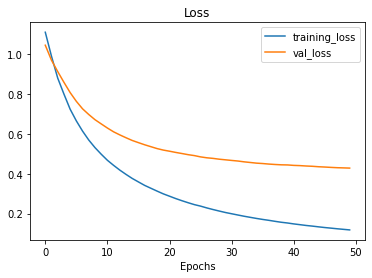

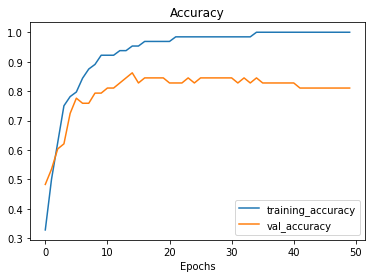

In [153]:
plot_loss_curves(efficientnet_history)

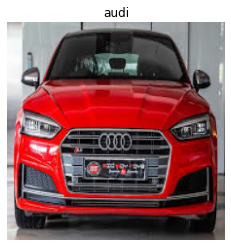

In [154]:
 # Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\audi\23.jpg")

# Make a prediction
pred = efficientnet_model.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

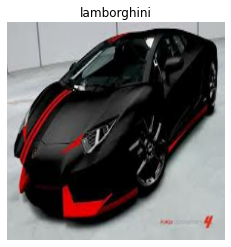

In [155]:
 # Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\lamborghini\18.jpg")

# Make a prediction
pred = efficientnet_model.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

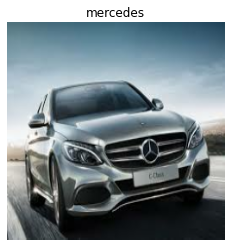

In [156]:
 # Load in and preprocess our custom image
img = load_and_prep_image(r"C:\Users\vivek\Downloads\Datasets\Datasets\Test\mercedes\45.jpg")

# Make a prediction
pred = efficientnet_model.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [174]:
class_names = dataset.class_names
class_names

['audi', 'lamborghini', 'mercedes']